In [105]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [45]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Splitting Data

In [64]:
# Vertical Split
features = ["YearsExperience"]
X = df[features]
target = "Salary"
y = df[target]

# Horizontal Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Plot of Experience vs Salary

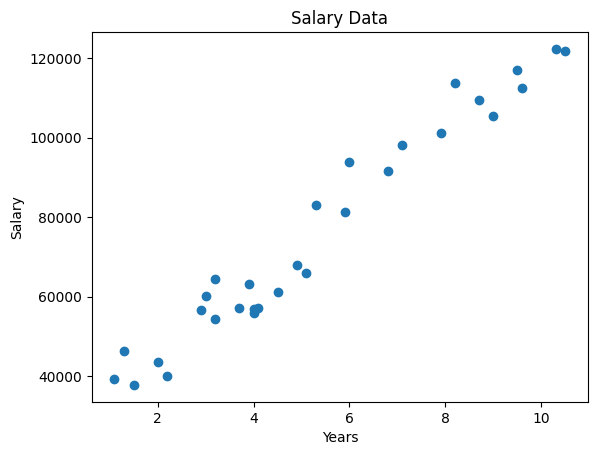

In [65]:
plt.scatter(X, y)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data");

## Build Model

In [66]:
# Baseline Error
y_mean = y_train.mean()
print("Mean error : ", round(y_mean, 2))
y_pred_baseline = [y_mean] * len(y_train)
print("Baseline error iteration: ", y_pred_baseline[:5])
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("MAE Baseline: ", round(mae_baseline, 2))
mae_error = [round(mae_baseline, 2)] * len(y_train)
print("MAE Baseline Error: ", mae_error[:5])

Mean error :  78501.21
Baseline error iteration:  [78501.20833333333, 78501.20833333333, 78501.20833333333, 78501.20833333333, 78501.20833333333]
MAE Baseline:  24722.48
MAE Baseline Error:  [24722.48, 24722.48, 24722.48, 24722.48, 24722.48]


### Scatter Plot with Baseline Model

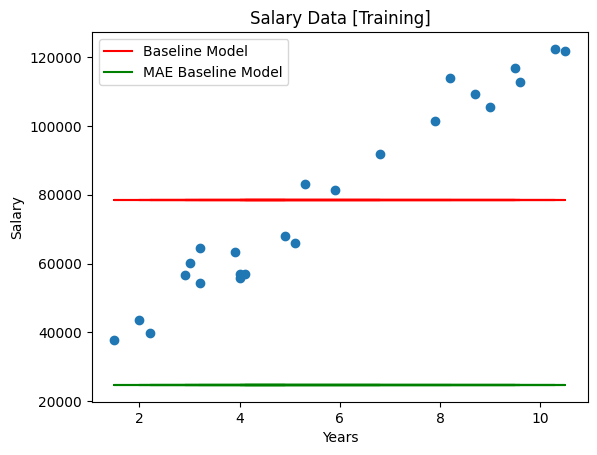

In [67]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_baseline, color="red", label="Baseline Model")
plt.plot(X_train, mae_error, color="green", label="MAE Baseline Model")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.legend()
plt.title("Salary Data [Training]");

## Model Instantiation & Fitting

In [68]:
# Instantiation and Training a model
model = LinearRegression().fit(X_train, y_train)
model 

LinearRegression()

### Model Performance

In [69]:
# Evaluation based on prediciton
y_pred = model.predict(X_train)
print("Prediction after model: ", y_pred[:3])
mae_pred = mean_absolute_error(y_train, y_pred)
print("MAE after prediciton: ", round(mae_pred, 2))


Prediction after model:  [102863.7816125   53101.92980825  43532.34292281]
MAE after prediciton:  4078.26


#### Extract Intercept

In [70]:
intercept = round(model.intercept_, 2)
print("Model Intercept: ", intercept)

Model Intercept:  24393.17


#### Extract Coefficient

In [71]:
coefficient = round(model.coef_[0], 2)
print("Coefficient of the Model: ", coefficient)

Coefficient of the Model:  9569.59


## Linear Regression Equation

In [72]:
print(f"Salary = {intercept} + {coefficient} * YearsExperience")

Salary = 24393.17 + 9569.59 * YearsExperience


## Model Evaluation

In [73]:
# Evaluation based on score
print("Score for training data: ", round(model.score(X_train, y_train), 2))
print("Score for testing data: ", round(model.score(X_test, y_test), 2))

Score for training data:  0.97
Score for testing data:  0.89


### Model Visualization with Training Data

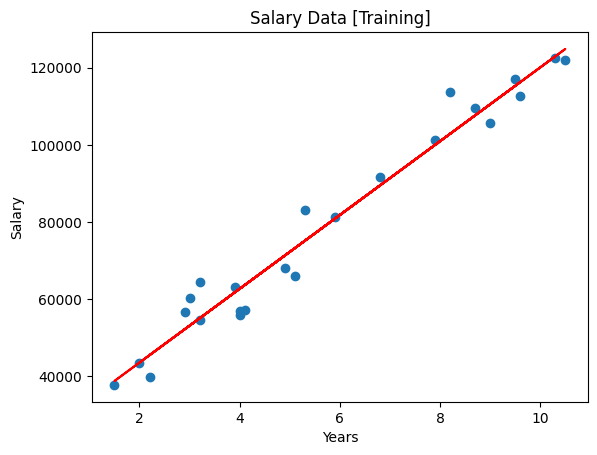

In [74]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color="red")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data [Training]");

### Model Visualization with Test Data

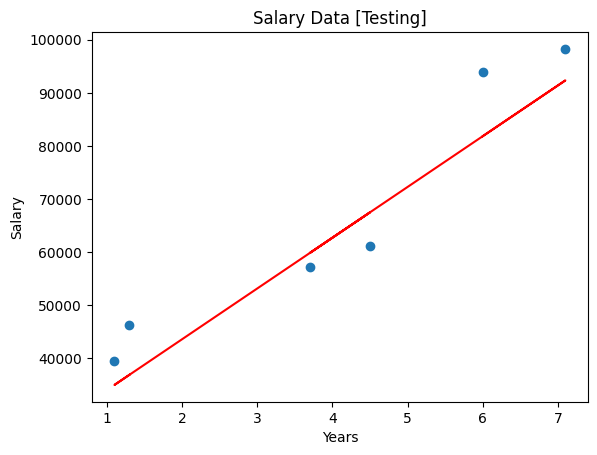

In [75]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color="red")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Salary Data [Testing]");

# Building Linear Regression model from scratch for one dimension

In [86]:
class LinearModel():
    
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self, X_train, y_train):
        X_train  = X_train.values # Convert to Numpy array
        y_train  = y_train.values # Convert to Numpy array
        num = 0
        denum = 0
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()))
            denum = denum + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
        
        self.m = num/denum
        self.b = y_train.mean() - (self.m * X_train.mean())

        print("Coefficient is : ", self.m)
        print("Intercept is : ", self.b)

    def predict(self, X_test):
        return self.m * X_test + self.b

In [87]:
lr = LinearModel()

In [88]:
lr.fit(X_train, y_train)

Coefficient is :  [9569.58688543]
Intercept is :  [24393.16915195]


In [108]:
y_pred_train = lr.predict(X_train)
mean_absolute_error(y_train, y_pred_train)


4078.2596424835115

In [109]:
r2_score(y_train, y_pred_train)

0.9654753572257188

In [89]:
lr.predict(X_test)

,YearsExperience
1,36833.632103
0,34919.714726
14,67456.310136
9,59800.640628
21,92337.236039
19,81810.690465


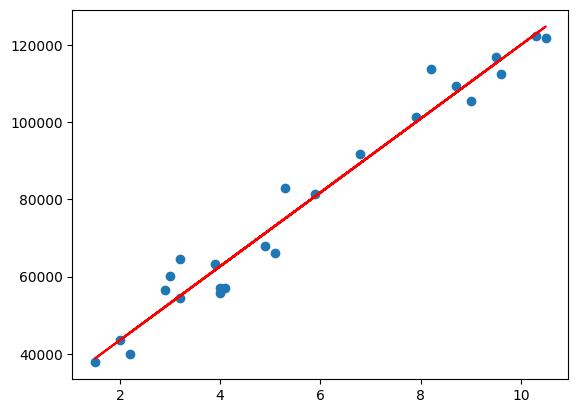

In [99]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color="red")


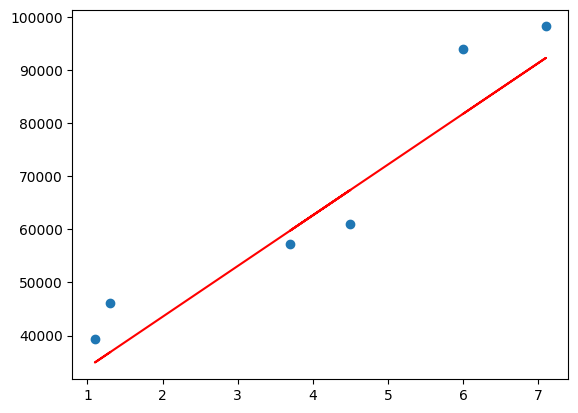

In [100]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color="red")